<a href="https://colab.research.google.com/github/audrey-siqueira/Desafio_NeuralMind-_AudreySiqueira/blob/main/Audrey_Siqueira_(C%C3%B3pia_de_Exercicios_20210207).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [113]:
print('Meu nome é: Audrey Siqueira')

Meu nome é: Audrey Siqueira


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e/ou `random`. Também pode-se usar o NumPy.

##Exercício 1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [114]:
def top_k(L, k):
    a=dict(Counter(L).most_common(k))
    print(a)
    return

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [115]:
from collections import Counter
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)

{'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [116]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [117]:
%%timeit
resultado = top_k(L=L, k=k)

{'k': 385544, 'y': 385506, 't': 385319, 'o': 385263, 'q': 385216, 'j': 384927, 'r': 384903, 'u': 384826, 'f': 384785, 'l': 384763, 'w': 384728, 'e': 384714, 'p': 384699, 'g': 384646, 's': 384630, 'c': 384599, 'h': 384570, 'i': 384346, 'v': 384279, 'z': 384240, 'n': 384114, 'm': 384048, 'a': 384011, 'b': 383871, 'd': 383822, 'x': 383631}
{'k': 385544, 'y': 385506, 't': 385319, 'o': 385263, 'q': 385216, 'j': 384927, 'r': 384903, 'u': 384826, 'f': 384785, 'l': 384763, 'w': 384728, 'e': 384714, 'p': 384699, 'g': 384646, 's': 384630, 'c': 384599, 'h': 384570, 'i': 384346, 'v': 384279, 'z': 384240, 'n': 384114, 'm': 384048, 'a': 384011, 'b': 383871, 'd': 383822, 'x': 383631}
{'k': 385544, 'y': 385506, 't': 385319, 'o': 385263, 'q': 385216, 'j': 384927, 'r': 384903, 'u': 384826, 'f': 384785, 'l': 384763, 'w': 384728, 'e': 384714, 'p': 384699, 'g': 384646, 's': 384630, 'c': 384599, 'h': 384570, 'i': 384346, 'v': 384279, 'z': 384240, 'n': 384114, 'm': 384048, 'a': 384011, 'b': 383871, 'd': 3838

## Exercício 2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [118]:
def tokens_to_ids(text, vocabulary):
     import re
     import pandas as pd

     d=re.findall(r"[\w']+|[.,!?;]",D)
     
     fora=list(set(d)-set(V.keys()))
     a={}
     a=a.fromkeys(fora,V['unknown'])
     V.update(a)
     
     #MÉTODO NATIVO SEM AJUDA DO PANDAS PORÉM NÃO ESCALONÁVEL
     #Lista_Identificadores =list(map(V.get, d))
     #print(Lista_Identificadores)

     #ESCALONÁVEL COM PANDAS
     Lista_Identificadores = pd.DataFrame().append(V,ignore_index=True)
     print(Lista_Identificadores[d].values[0])

     return

In [119]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

tokens_to_ids(D, V)

[-1.  3.  2.  4. -1.  5.]


Mostre que sua implementação esta correta com um exemplo pequeno:

---



Mostre que sua implementação é eficiente com um exemplo grande:

In [120]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000* ['Eu gosto de comer pizza.'])

In [121]:
%%timeit
tokens_to_ids(D, V)

[-1.  3.  2. ...  4. -1.  5.]
[-1.  3.  2. ...  4. -1.  5.]
[-1.  3.  2. ...  4. -1.  5.]
[-1.  3.  2. ...  4. -1.  5.]
1 loop, best of 3: 3.93 s per loop


## Exercício 3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [122]:
def sample(path: str, k: int):
     import random
     arquivo = open(filename)
     arquivo_conteudo = arquivo.read()
     arquivo_separado = arquivo_conteudo.splitlines()

     random.shuffle(arquivo_separado)

     return arquivo_separado[0:k]

Mostre que sua implementação está correta com um exemplo pequeno:

In [123]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)

print(samples)
print(len(samples) == n_samples)

['line 52', 'line 13', 'line 77', 'line 39', 'line 58', 'line 72', 'line 43', 'line 30', 'line 97', 'line 95']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [124]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [125]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

1 loop, best of 3: 995 ms per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: **mp(n −1)** 
- número de multiplicações: **mnp** 
- número de flops: **2mnp-mp (aproximadamente 2mnp )**

## Exercício 2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [126]:
import numpy as np

In [127]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [128]:
np.vstack(A.mean(1))


array([[ 2.5],
       [ 8.5],
       [14.5],
       [20.5]])

## Exercício 3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [130]:
A = np.arange(24).reshape(4, 6)
num= A.min()
den=(A.max()-A.min())
Normalized=(A-num)/(den)
print(Normalized)



[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [131]:
A = np.arange(24).reshape(4, 6)
print(A)


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [132]:
A = np.arange(24).reshape(4, 6)

mins = np.min(A, axis=0)
maxs = np.max(A, axis=0)
dens = maxs - mins

Normalized_by_Columns = (A-mins)/(dens)

print(Normalized_by_Columns.round(2))


[[0.   0.   0.   0.   0.   0.  ]
 [0.33 0.33 0.33 0.33 0.33 0.33]
 [0.67 0.67 0.67 0.67 0.67 0.67]
 [1.   1.   1.   1.   1.   1.  ]]


## Exercício 5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas. A solução deve funcionar para qualquer tamanho de matriz.


In [133]:
A = np.arange(24).reshape(4, 6)
A=np.transpose(A)

mins = np.min(A, axis=0)
maxs = np.max(A, axis=0)
dens = maxs - mins

Normalized_by_Lines = (A-mins)/(dens)
Normalized_by_Lines =np.transpose(Normalized_by_Lines)


print(Normalized_by_Lines.round(2))


[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em aprendizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [134]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    col_max = np.amax(A,axis=1,keepdims = True)
    A_exp = np.exp(A - col_max)
    A_sum = np.sum(A_exp, axis = 1, keepdims = True)
    res = A_exp / A_sum
    
    return res
     

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [135]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

Rode o código a seguir para verificar se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [136]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [137]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [138]:
%%timeit
softmax(A)

1 loop, best of 3: 291 ms per loop


In [139]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1



Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [140]:
def one_hot(y, n_classes):
   hot=np.squeeze(np.eye(n_classes)[y.reshape(-1)])
   print(hot)
   return

In [141]:
N_CLASSES = 9
N_SAMPLES = 10

y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[2 7 4 0 3 0 8 8 8 8]
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
None


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [142]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

In [143]:
%%timeit
one_hot(y, N_CLASSES)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1 loop, best of 3: 162 ms per loop


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [144]:
import torch

In [145]:
torch.__version__

'1.7.0+cu101'

## Tensor com atributo .requires_grad=*True*
Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [146]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [147]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [148]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

### Montagem do grafo computacional - forward

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [149]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)

e2 = e.pow(2) ; print('e2 =', e2)

J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Auto grad - processa o grafo computacional backward

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [150]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [151]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [152]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [153]:
x = torch.arange(0, 4).float()
print(x)
y = torch.arange(0, 8, 2).float()
print(y)
w = torch.ones(1)
print(w)

tensor([0., 1., 2., 3.])
tensor([0., 2., 4., 6.])
tensor([1.])


In [154]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
iteracoes = 1

it=[]
Loss=[]

def J_func(w, x, y):
     
    for i in range(iteracoes): 

      #Loss Function
      y_pred = w*x 
      e = y_pred - y
      e2 = e.pow(2) 
      J = e2.sum() 

      #Diferencas finitas EXERCÍCIO 1
      deltaW=0.5
      grad = (sum( ( (w+deltaW)*x - y)**2 ) - sum( ( (w-deltaW)*x - y)**2 ))/(2*deltaW)
        
      #Novo valor de w
      w = w - learning_rate * grad

      print("iteration {}".format(i))
      print ("loss {} , gradient {} , weight {}".format(J,grad,w))

      #Para plotar o gráfico
      it.append(i)
      Loss.append(J)


x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
         
J_func(w,x,y) 

        
    

iteration 0
loss 14.0 , gradient -28.0 , weight tensor([1.2800])


##Exercício 2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

iteration 0
loss 14.0 , gradient -28.0 , weight tensor([1.2800])
iteration 1
loss 7.2576003074646 , gradient -20.160001754760742 , weight tensor([1.4816])
iteration 2
loss 3.762338399887085 , gradient -14.515199661254883 , weight tensor([1.6268])
iteration 3
loss 1.9503965377807617 , gradient -10.450942993164062 , weight tensor([1.7313])
iteration 4
loss 1.011085033416748 , gradient -7.524677276611328 , weight tensor([1.8065])
iteration 5
loss 0.5241461992263794 , gradient -5.41776704788208 , weight tensor([1.8607])
iteration 6
loss 0.2717175781726837 , gradient -3.90079402923584 , weight tensor([1.8997])
iteration 7
loss 0.14085862040519714 , gradient -2.8085713386535645 , weight tensor([1.9278])
iteration 8
loss 0.07302114367485046 , gradient -2.0221714973449707 , weight tensor([1.9480])
iteration 9
loss 0.03785419464111328 , gradient -1.455963373184204 , weight tensor([1.9626])
iteration 10
loss 0.019623562693595886 , gradient -1.0482935905456543 , weight tensor([1.9730])
iteration 

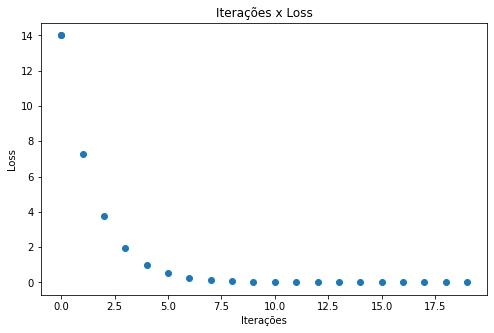

In [155]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

J_func(w, x, y)

#Plotando o gráfico
plt.rcParams['figure.figsize'] = (8,5)
plt.plot(it,Loss,'o')
plt.title('Iterações x Loss')
plt.ylabel('Loss')
plt.xlabel('Iterações')
plt.show()

##Exercício 3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


iteration 0
loss 14.0 , gradient -28.0 , weight tensor([1.2800], grad_fn=<SubBackward0>)
iteration 1
loss 7.2576003074646 , gradient -20.160001754760742 , weight tensor([1.4816], grad_fn=<SubBackward0>)
iteration 2
loss 3.762338399887085 , gradient -14.51519775390625 , weight tensor([1.6268], grad_fn=<SubBackward0>)
iteration 3
loss 1.9503965377807617 , gradient -10.450942993164062 , weight tensor([1.7313], grad_fn=<SubBackward0>)
iteration 4
loss 1.011085033416748 , gradient -7.52467679977417 , weight tensor([1.8065], grad_fn=<SubBackward0>)
iteration 5
loss 0.5241461992263794 , gradient -5.417766094207764 , weight tensor([1.8607], grad_fn=<SubBackward0>)
iteration 6
loss 0.2717175781726837 , gradient -3.9007928371429443 , weight tensor([1.8997], grad_fn=<SubBackward0>)
iteration 7
loss 0.14085862040519714 , gradient -2.808573007583618 , weight tensor([1.9278], grad_fn=<SubBackward0>)
iteration 8
loss 0.07302114367485046 , gradient -2.0221731662750244 , weight tensor([1.9480], grad_fn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.


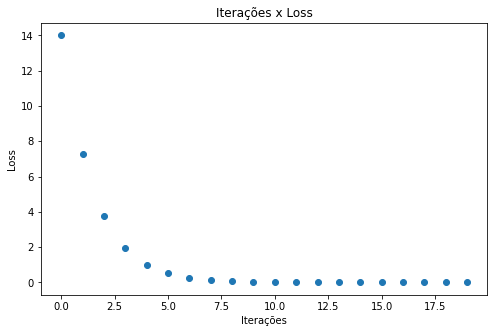

In [156]:
from __future__ import division
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

it=[]
Loss=[]

def J_func(w, x, y):
     
  for i in range(iteracoes): 

      #Loss Function
      y_pred = w*x 
      e = y_pred - y
      e2 = e.pow(2) 
      J = e2.sum() 

      #método backward() do pytorch EXERCÍCIO 3
      if w.grad: w.grad.zero_()
      w.retain_grad()
      J.backward()
      grad=w.grad.item()

      w = w - learning_rate*grad

      print("iteration {}".format(i))
      print ("loss {} , gradient {} , weight {}".format(J,grad,w))

      #Para plotar o gráfico
      it.append(i)
      Loss.append(J)

  
J = J_func(w, x, y)
    
#Plotando o gráfico
plt.rcParams['figure.figsize'] = (8,5)
plt.plot(it,Loss,'o')
plt.title('Iterações x Loss')
plt.ylabel('Loss')
plt.xlabel('Iterações')
plt.show()

##Exercício 4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta: O valor de $\Delta w$ deve ser pequeno, por ser proporcional ao erro que queremos obter. Se o valor não for pequeno, nossa aproximação será imprecisa, por outro lado se o valor for muito pequeno, nosso erro de aproximação também diminuirá, porém ira exigir mais trabalho do computador.

##Exercício 5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a)  Método de Diferenças finitas possui complexibilidade de **$O(N)$**, devido as subtrações e divisões da iteração não alterarem a complexibilidade original de $(x_i w - y_i)^2$

b) Método de backpropagation possui complexibilidade de  **$O(N^2$)**  , devido a complexibilidade das derivadas parciais.

##Exercício 6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta: O valor estimado esperado para cada predição vai ser $(k)^-1$, logo a equação de entropia cruzada pode ser resumida em : 

 $L=-log(k^-1)$, resultando em **$L= log(k)$** .

 A entropia cruzada será proporcional ao logaritmo do número de classes.

## Fim do notebook